In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math

/share/pkg.7/python3/3.7.7/install/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [16]:
path = "data/FB.csv"
df = pd.read_csv(path)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


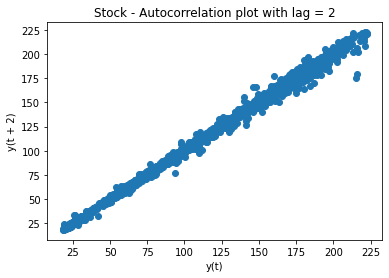

In [17]:
plt.figure()
lag_plot(df['Open'], lag=2)
plt.title('Stock - Autocorrelation plot with lag = 2')
plt.show()

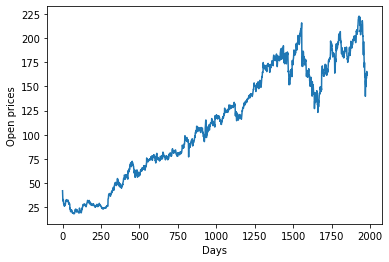

In [18]:
open_price = df.Open.values.astype('float32')
open_price = open_price.reshape(-1, 1)
plt.plot(open_price)
plt.ylabel("Open prices")
plt.xlabel("Days")
plt.show()

Testing Root Mean Squared Error is 4.035461461241668


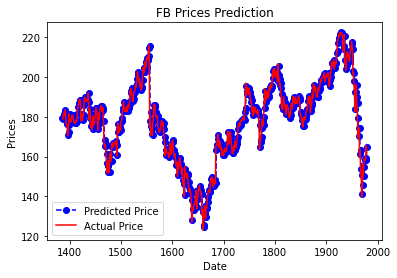

In [28]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Open'].values
test_data = test_data['Open'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Root Mean Squared Error is {}'.format(math.sqrt(MSE_error)))

test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('FB Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

AMZN

/share/pkg.7/python3/3.7.7/install/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Root Testing Mean Squared Error is 13.611005527642927


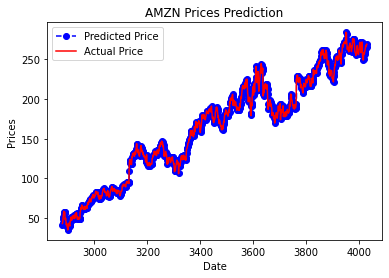

In [37]:
path = "data/AMZN.csv"
df = pd.read_csv(path)

train_data, test_data = df[0:int(len(df)*0.3)], df[int(len(df)*0.5):int(len(df)*0.7)]
training_data = train_data['Open'].values
test_data = test_data['Open'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Root Testing Mean Squared Error is {}'.format(MSE_error))

test_set_range = df[int(len(df)*0.5):int(len(df)*0.7)].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('AMZN Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

AAPL

/share/pkg.7/python3/3.7.7/install/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/share/pkg.7/python3/3.7.7/install/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Root Mean Squared Error is 1.3534916975906106


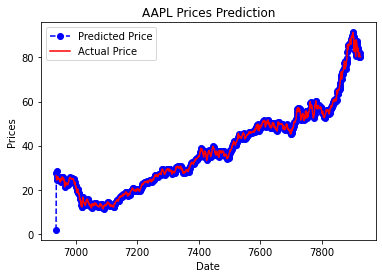

In [38]:
path = "data/AAPL.csv"
df = pd.read_csv(path)

train_data, test_data = df[0:int(len(df)*0.3)], df[int(len(df)*0.7):int(len(df)*0.8)]
training_data = train_data['Open'].values
test_data = test_data['Open'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Root Mean Squared Error is {}'.format(MSE_error))

test_set_range = df[int(len(df)*0.7):int(len(df)*0.8)].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('AAPL Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()